In [1]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions
)
import torch

In [50]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    # "mirna": mirna_loader,
    # "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [54]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=80,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-12-08 18:04:52,617] A new study created in memory with name: no-name-0c73d142-27f8-4358-8fd1-3942835e4763
[I 2024-12-08 18:04:52,743] Trial 0 finished with value: 0.23578778812922616 and parameters: {'booster': 'dart', 'lambda': 6.834068641306326e-05, 'alpha': 9.775700254757168e-08, 'max_depth': 8, 'eta': 0.17242168444419495, 'gamma': 1.9475193547304386e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0023484271962786484, 'skip_drop': 0.3738983845714371}. Best is trial 0 with value: 0.23578778812922616.
[I 2024-12-08 18:04:52,812] Trial 1 finished with value: 0.42269735057506 and parameters: {'booster': 'gblinear', 'lambda': 0.00020461188554259834, 'alpha': 0.0038168572287495856}. Best is trial 1 with value: 0.42269735057506.
[I 2024-12-08 18:04:52,909] Trial 2 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.00045878948739357795, 'alpha': 2.6978591243820937e-08}. Best is trial 2 wi

New best score: 0.236
Best model performance:
Accuracy: 0.638 ± 0.085
F1 Macro: 0.601 ± 0.145
F1 Weighted: 0.615 ± 0.121
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.5, 'f1_macro': np.float64(0.3333333333333333), 'f1_weighted': np.float64(0.4)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.5833333333333333)}]
New best score: 0.423
Best model performance:
Accuracy: 0.755 ± 0.046
F1 Macro: 0.747 ± 0.052
F1 Weighted: 0.750 ± 0.046
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weigh

[I 2024-12-08 18:04:53,008] Trial 3 finished with value: 0.2149085674931129 and parameters: {'booster': 'gbtree', 'lambda': 5.708622604842383e-08, 'alpha': 2.64799052372398e-05, 'max_depth': 8, 'eta': 6.955339575804593e-08, 'gamma': 0.0007789118270016339, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.49764519230326676.
[I 2024-12-08 18:04:53,110] Trial 4 finished with value: 0.21534604040404037 and parameters: {'booster': 'dart', 'lambda': 0.09322511719342003, 'alpha': 3.390454804352945e-06, 'max_depth': 6, 'eta': 0.044635597943944595, 'gamma': 0.00027053104042727656, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 3.1250951742358665e-07, 'skip_drop': 0.0018013990989907095}. Best is trial 2 with value: 0.49764519230326676.
[I 2024-12-08 18:04:53,175] Trial 5 finished with value: 0.49764519230326676 and parameters: {'booster': 'gblinear', 'lambda': 0.0007622837272761991, 'alpha': 8.522861147673667e-07}. Best is trial 2 with va

Best model performance:
Accuracy: 0.795 ± 0.064
F1 Macro: 0.791 ± 0.061
F1 Weighted: 0.792 ± 0.063
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.00045878948739357795, 'alpha': 2.6978591243820937e-08}


In [55]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}
{'ENSG00000239839': [0.3518083691596985, -0.34498393535614014], 'ENSG00000064687': [0.022663408890366554, -0.02419247105717659], 'ENSG00000254995': [-0.13668416440486908, 0.16104626655578613], 'ENSG00000240247': [0.23915641009807587, -0.22322620451450348], 'ENSG00000163221': [0.22862349450588226, -0.2317061573266983], 'ENSG00000206047': [0.17156755924224854, -0.17819522321224213], 'ENSG00000122224': [0.17812134325504303, -0.17636117339134216], 'ENSG00000188153': [-0.20978346467018127, 0.2118472009897232], 'ENSG00000233822': [0.31838783621788025, -0.28112953901290894], 'ENSG00000091181': [0.049062177538871765, -0.06063332036137581], 'ENSG00000138131': [0.028252772986888885, -0.030989021062850952], 'ENSG00000075275': [0.17725028097629547, -0.17244577407836914], 'ENSG00000106976': [-0.10676223039627075, 0.1093587726354599], 'ENSG00000111249': [0.12950177490711212, -0.1137

In [56]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)

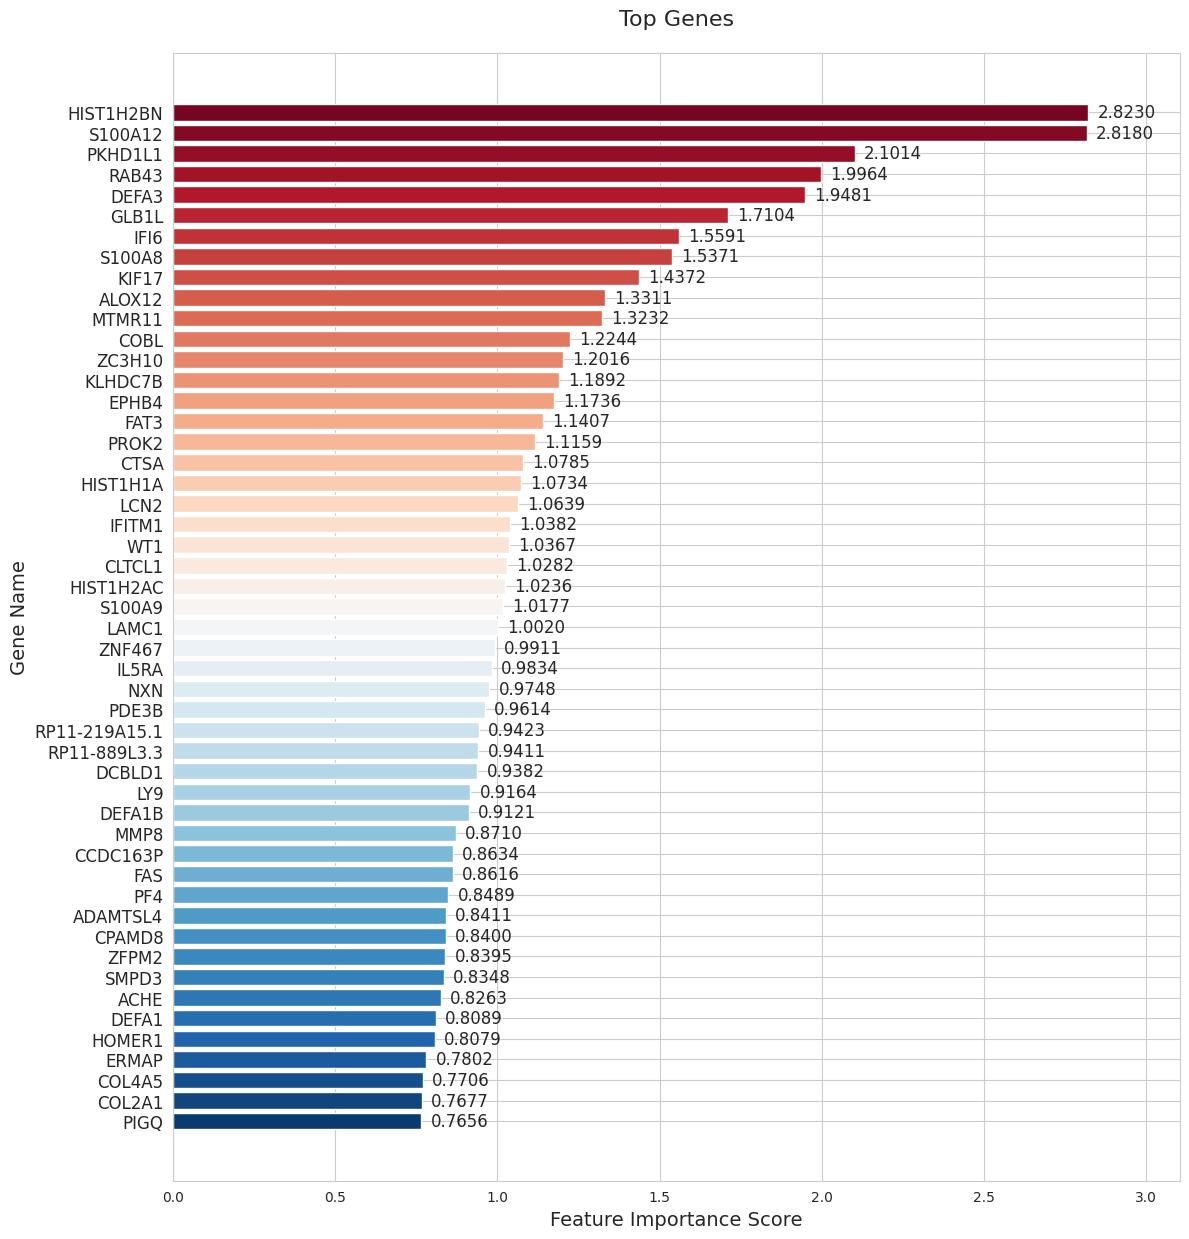

In [57]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes")

In [58]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 50
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [59]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
mrna_A = torch.logical_or(gg_A, pp_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(35), tensor(0.), tensor(0.))

4580


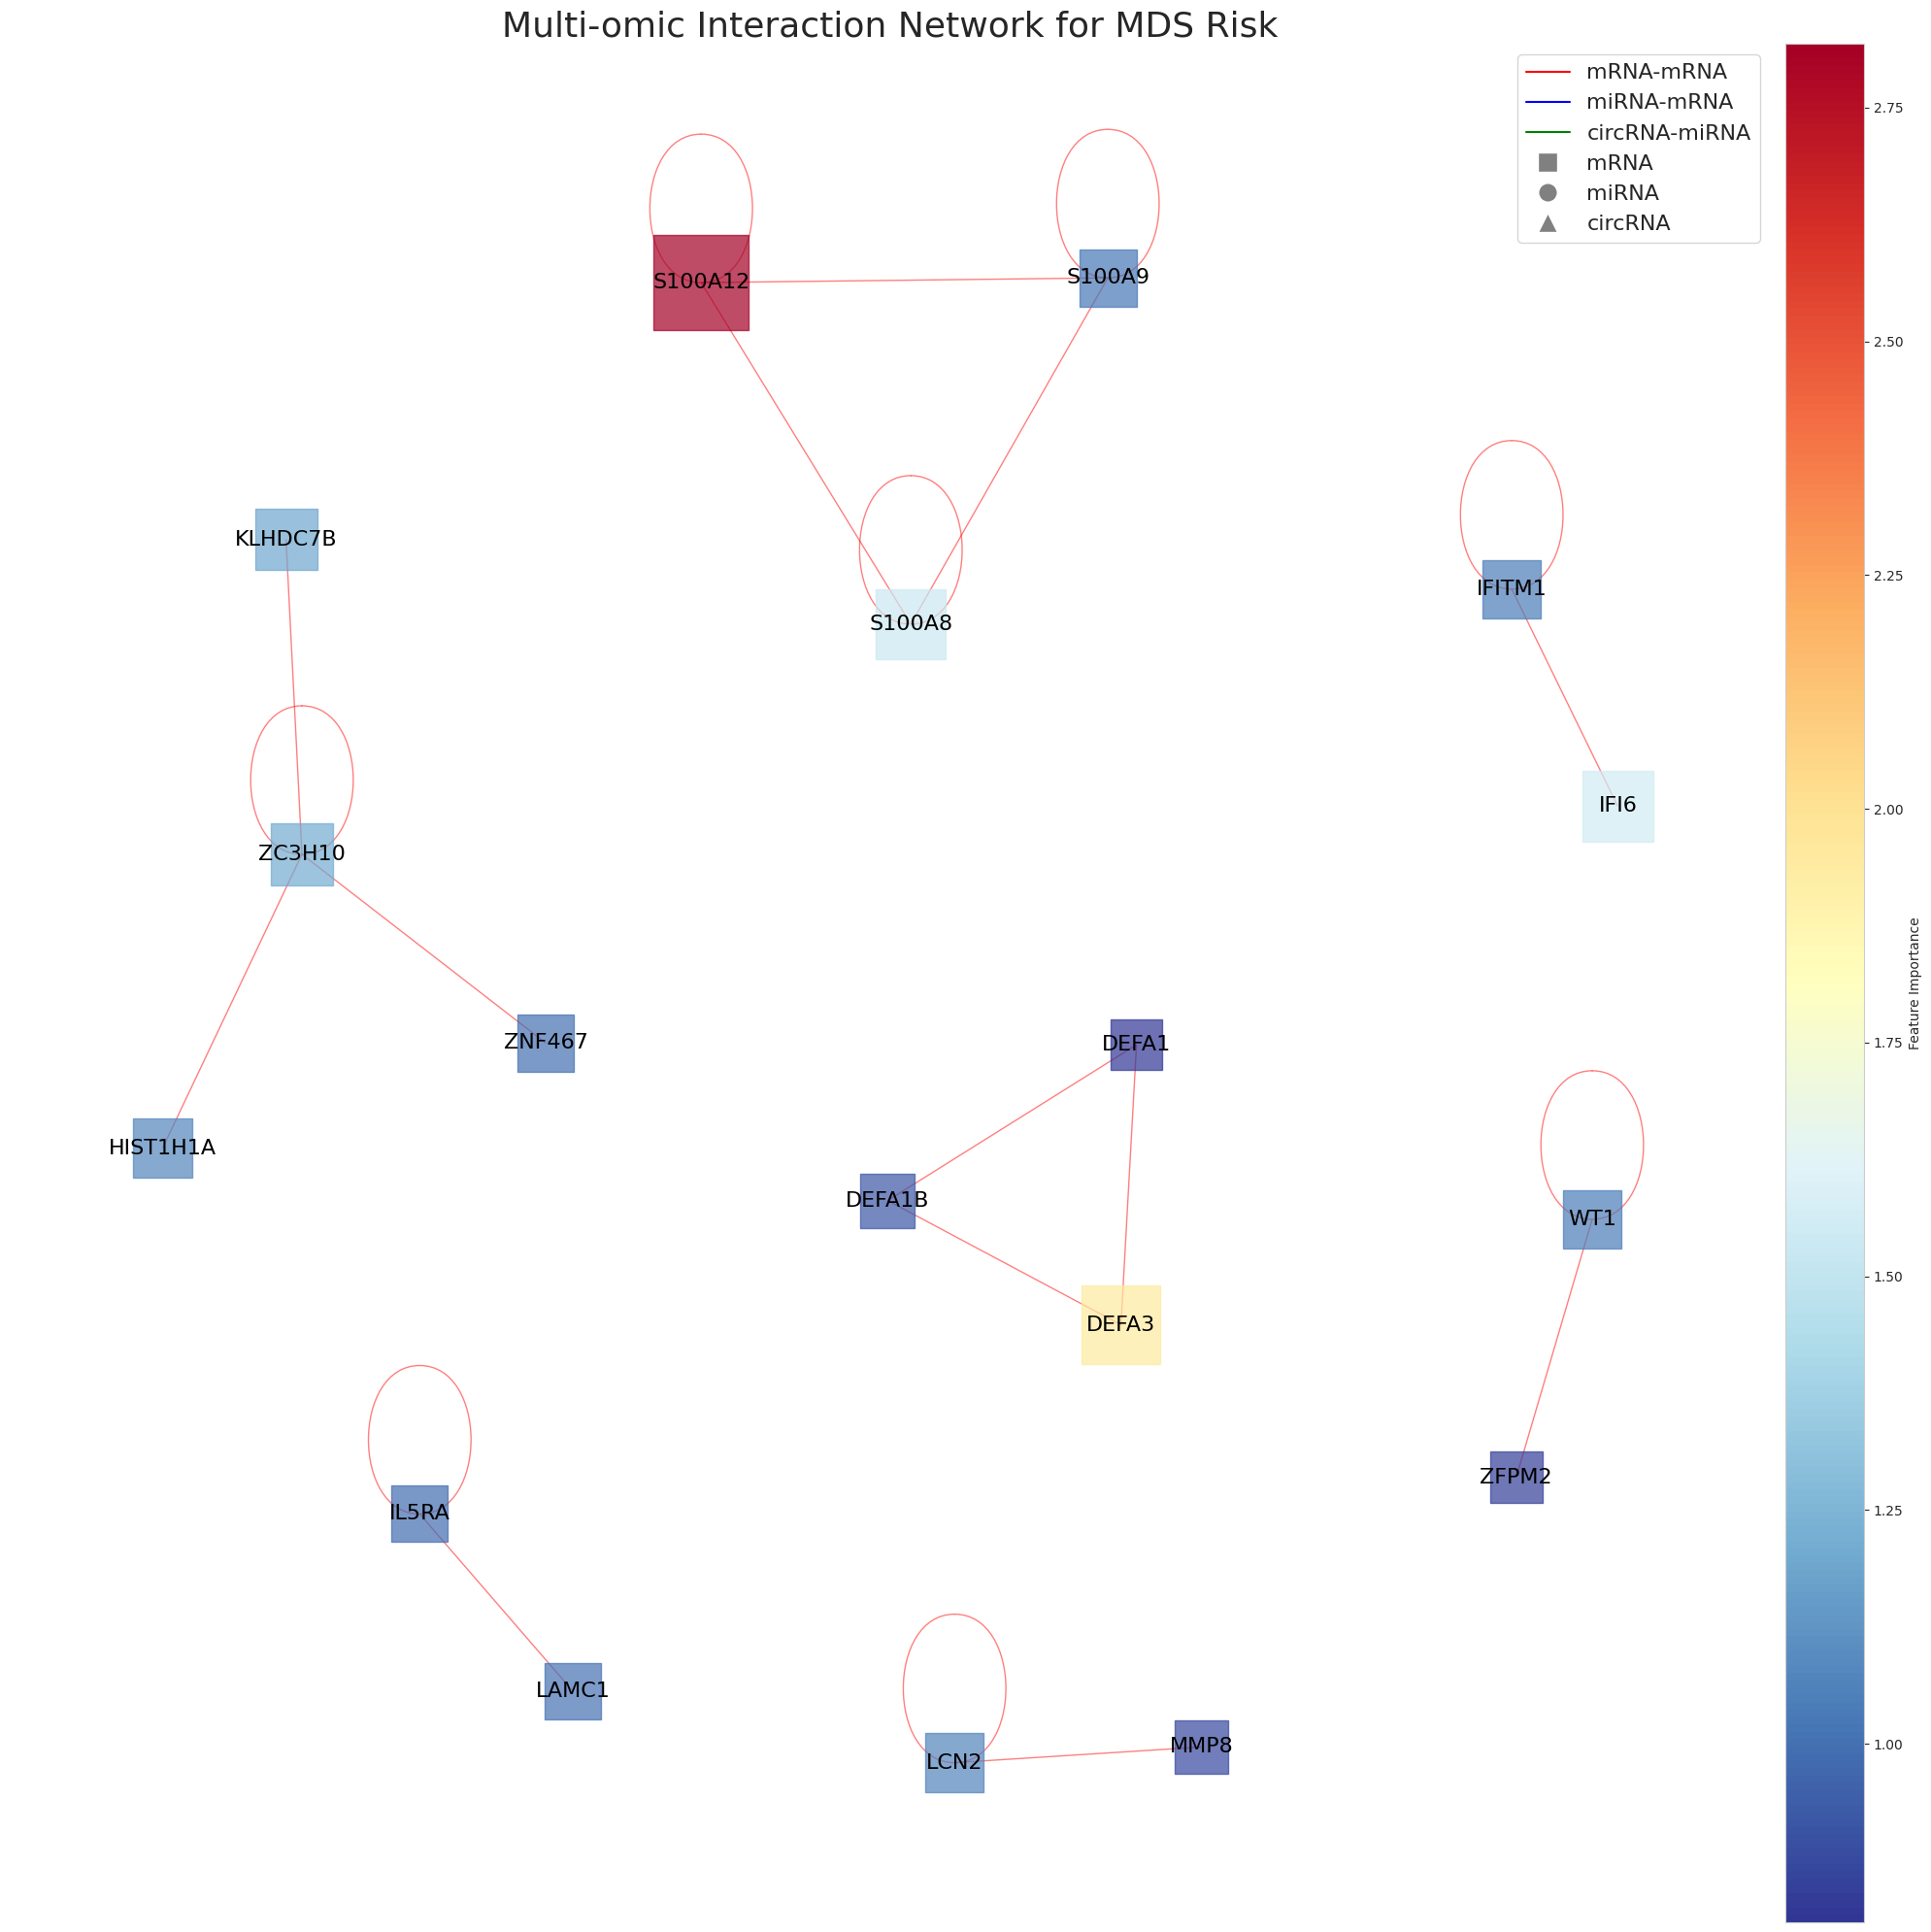

In [60]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
seed = 4580 # - risk
# seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Multi-omic Interaction Network for MDS Risk",
    figsize=(20,20),
    max_iter=500,
    gravity=1.0,
    jitter_tolerance=2.0,
)
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

- the DEFA gene family which has high scores here has been associated with different types of cancer but not with MDS it seems
- [Whole blood defensin mRNA expression is a predictive biomarker of docetaxel response in castration-resistant prostate cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC4527520/) 


In [51]:
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

<Figure size 640x480 with 0 Axes>

[MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)